### Exploratory Data Analysis & Text Preprocessing (Tokenize, Stem, Lemmatize)


### 2.1 Import files

- average/describe.() of the cats/dogs. 
- 

In [1]:
import requests
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk import pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [2]:
!pip install spacy spacytextblob
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 519 kB/s eta 0:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy

In [4]:
!pip install spacymoji

In [5]:
!pip install spacy-langdetect

In [6]:
from langdetect import detect

In [7]:
dogs = pd.read_csv("../project_3/CSV files/dogs.csv")

In [8]:
cats = pd.read_csv('../project_3/CSV files/cats.csv')

In [9]:
print('Cats dataframe:', cats.shape)
print('Dogs dataframe:', dogs.shape)

Cats dataframe: (9997, 3)
Dogs dataframe: (9996, 3)


In [10]:
dogs.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
cats.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
print('Cats dataframe:', cats.shape)
print('Dogs dataframe:', dogs.shape)

Cats dataframe: (9997, 2)
Dogs dataframe: (9996, 2)


### 2.2 Creating a dataframe by combining both subreddits dataframes

In [13]:
frames = [dogs, cats]

In [14]:
df = pd.concat(frames)

In [15]:
print(df.shape)
df.tail() #Should reset index count 

(19993, 2)


,subreddit,title
9992,cats,Mooches.
9993,cats,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her"
9994,cats,"it was a nice day out, so we let Swiper out into the backyard for a few minutes"
9995,cats,Morning snuggles are best snuggles
9996,cats,When I adopted him vs now


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df #index reset! 

,subreddit,title
0,dogs,My dog bites himself
1,dogs,How do you keep your dogs passively stimulated?
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife
3,dogs,Soft food diet after surgery
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?
...,...,...
19988,cats,Mooches.
19989,cats,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her"
19990,cats,"it was a nice day out, so we let Swiper out into the backyard for a few minutes"
19991,cats,Morning snuggles are best snuggles


In [18]:
df.to_csv('../project_3/CSV files/dataframe_dogs&cats.csv')

### 2.3 Exploratory Data Analysis

### Loading in the corpus

In [19]:
df = pd.read_csv('../project_3/CSV files/dataframe_dogs&cats.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19993 entries, 0 to 19992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19993 non-null  int64 
 1   subreddit   19993 non-null  object
 2   title       19993 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.7+ KB


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.drop(columns ='Unnamed: 0', axis=1, inplace=True) #to drop unnamed column

In [23]:
df 

,subreddit,title
0,dogs,My dog bites himself
1,dogs,How do you keep your dogs passively stimulated?
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife
3,dogs,Soft food diet after surgery
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?
...,...,...
19988,cats,Mooches.
19989,cats,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her"
19990,cats,"it was a nice day out, so we let Swiper out into the backyard for a few minutes"
19991,cats,Morning snuggles are best snuggles


In [24]:
df.describe(include='all')

,subreddit,title
count,19993,19993
unique,2,19614
top,cats,Cat
freq,9997,11


- There seem to be repeat messages, with 19614 unique titles out of 19993 titles
- Subreddit cats seem to be more than dogs. 
- The most frequent word is 'Cat', though it appears only in 11 different titles. Not significant enough

In [25]:
df.groupby('subreddit').describe()

title                  
          count unique   top freq
subreddit                        
cats       9997   9771   Cat   11
dogs       9996   9858  Help    8

- Seems like people love to use the word 'cat' for redditors in the Cats subreddit. 
- Do more people seem to seek help for dogs in the Dogs subreddit?

### Length of Title 

In [26]:
df['length'] = df['title'].apply(len) #I'll create a new feature to detect how long the messages are

In [27]:
df['length'].describe()

count    19993.000000
mean        50.438403
std         42.100038
min          1.000000
25%         24.000000
50%         39.000000
75%         62.000000
max        305.000000
Name: length, dtype: float64

- The mean length of title is about 50 words
- The maximum length of title is about 305 (but Reddit has a 300-word limitation on its title).

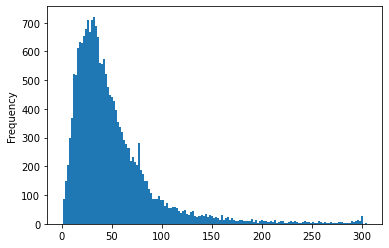

In [28]:
df['length'].plot.hist(bins=150); #this shows the distribution of the message length

- The distribution is right skewed, meaning most title lengths are usually shorter. 
- The maximum length in the title is about 300, although this is likely due to Reddit's 300-word limitation on the titles. There seem to be some titles with more than 300 words though. 

In [29]:
df[df['length']==305] #To check which post has the maximum number of length in the title. 

,subreddit,title,length
6858,dogs,"Help ! My ten month has food allergies. We just cleared him out from the last one,he was allergic to lamb but he’s reacting to another food now &amp;&amp; is super itchy. He has raw spots from licking &amp;&amp; scratching. Gonna take him to the vet Monday but is there anything I can do in the mean time?",305


In [30]:
df[df['length']==305]['title'].iloc[0] #To read the longest message in subreddit Dogs

'Help ! My ten month has food allergies. We just cleared him out from the last one,he was allergic to lamb but he’s reacting to another food now &amp;&amp; is super itchy. He has raw spots from licking &amp;&amp; scratching. Gonna take him to the vet Monday but is there anything I can do in the mean time?'

- Seems like both longer messages are a cry for help with pet-related issues 

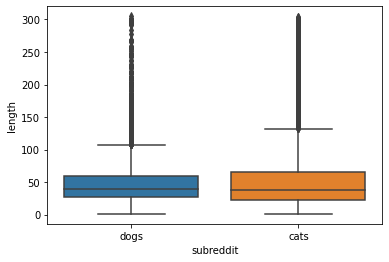

In [31]:
sns.boxplot(x='subreddit', y='length', data=df);

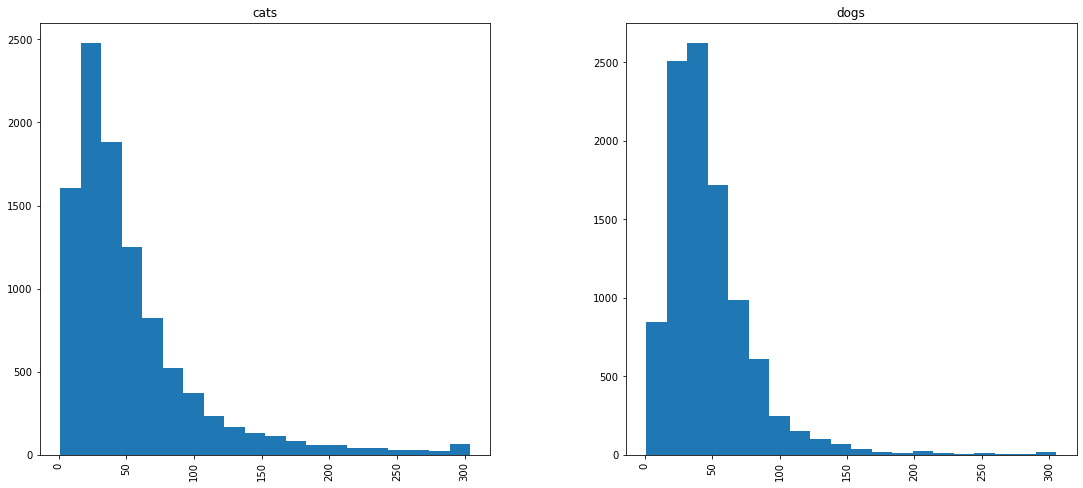

In [32]:
df.hist(column='length', by='subreddit', bins=20, figsize= (18,8));

- Under the Cats subreddit, at least 4000 posts have titles shorter than 50 words. Some redditors in the subreddit 'Cats' seem to prefer longer titles as well. 
- Interestingly, most of the title lengths for subreddit dogs hover about 50 words. 
- Generally, the histogram of redditors of both subreddit forums appear similar in terms of title length i.e. right skewed. 

### Title Word Count

In [33]:
df['title_word_count'] = df['title'].map(lambda x: len(x.split())) #I create another feature to check the number of words in the post

In [34]:
df

,subreddit,title,length,title_word_count
0,dogs,My dog bites himself,20,4
1,dogs,How do you keep your dogs passively stimulated?,47,8
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7
3,dogs,Soft food diet after surgery,28,5
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8
...,...,...,...,...
19988,cats,Mooches.,8,1
19989,cats,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",130,27
19990,cats,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",79,18
19991,cats,Morning snuggles are best snuggles,34,5


In [35]:
#the bottom 5 posts with the least number of word count
df.sort_values(by='title_word_count', ascending=True).head()

,subreddit,title,length,title_word_count
13575,cats,ᴾᵒᵘⁿᶜᵉ,6,1
8493,dogs,Vetoryl,7,1
9428,dogs,Insurance?,10,1
19210,cats,Chillin,7,1
15092,cats,Hitchhiker,10,1


In [36]:
#the top 5 posts with the most number of word count
df.sort_values(by='title_word_count', ascending=False).head() 

,subreddit,title,length,title_word_count
19765,cats,My cat just on free will come to me and laid down.now if I move my cat gets angry and scratches me. But I still love him very much🖤. He and one of my other cats fight often tho so I have to keep a eye on them but I love my cats very much🐱. But this those he do this because he likes me or?,289,66
18374,cats,"I just found this cat on the streets and he kept following me. He has been in my house the last 2 days and didnt leave yet so i think we are now stuck with eachother. But he seems to have a problem with his eyes, they seem dirty and i dont know what to do, can anyone help? What do i cats even need??",300,65
18925,cats,"What would you do to try to tame these two? I've fed a large family of ferals for the last three years, did the TNR on most of them including these two - the only ones around now. They come to my front door for the food but will not let me get near them. They're 2yo siblings - Sox and Seamus 🙂",294,63
13024,cats,"Foster bottlefed baby called Napoleon. He was found under a hedge on the day he was born, developed URI at 3 days and had an abces under his eyelid while his eyes were still closed because of his age. He had to come for afar but he is thriving now (he is 7 wks old now and will be adopted at 12 wks",298,63
18009,cats,"We chose to put down our cat today. Her name was Mary Kate and she lived for a strong 17 years. She has been in our lives since before I was born. It's hard to say goodbye but she was in a lot of pain, she was sick and started starving herself. I'm really going to miss her. We love you Mary Kate.",297,63


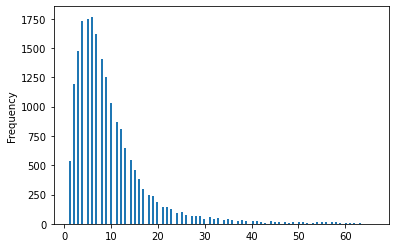

In [37]:
df['title_word_count'].plot.hist(bins=150); #this shows the distribution of the word count

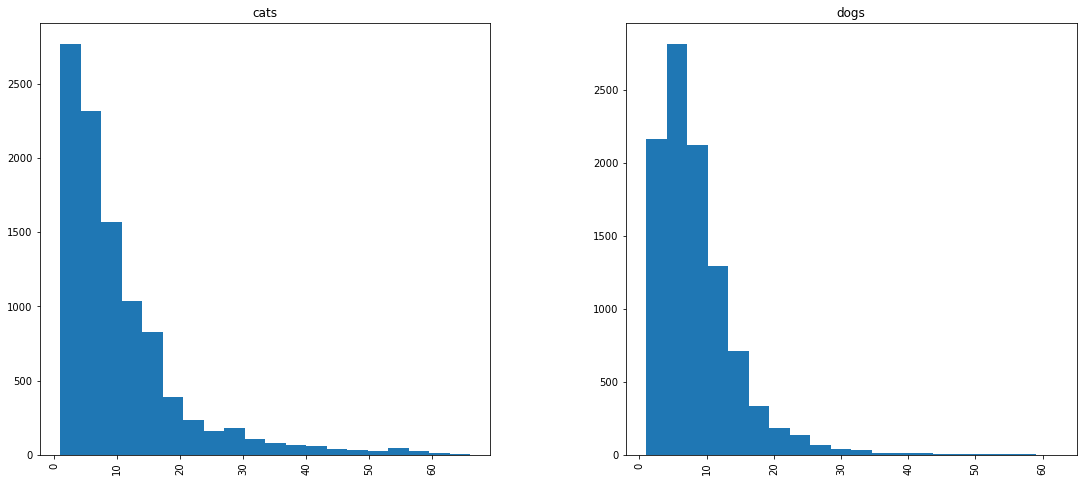

In [38]:
df.hist(column='title_word_count', by='subreddit', bins=20, figsize= (18,8));

### Number of unique words in the text

In [39]:
df["num_unique_words"] = df["title"].apply(lambda x: len(set(str(x).split())))
print('maximum of num_unique_words in a title:',df["num_unique_words"].max())
print('mean of num_unique_words in data_df:',df["num_unique_words"].mean())

maximum of num_unique_words in a title: 57
mean of num_unique_words in data_df: 9.269844445555945


In [40]:
df.head()

,subreddit,title,length,title_word_count,num_unique_words
0,dogs,My dog bites himself,20,4,4
1,dogs,How do you keep your dogs passively stimulated?,47,8,8
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7
3,dogs,Soft food diet after surgery,28,5,5
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8


### Number of stopwords in the text

In [41]:
df["num_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words('english')]))

In [42]:
print('maximum of num_stopwords in data_df:',df["num_stopwords"].max())

maximum of num_stopwords in data_df: 40


### Number of punctuations in the text

In [43]:
df["num_punctuations"] = df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
print('maximum of num_punctuations in data_df:',df["num_punctuations"].max())

maximum of num_punctuations in data_df: 36


In [44]:
df

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations
0,dogs,My dog bites himself,20,4,4,2,0
1,dogs,How do you keep your dogs passively stimulated?,47,8,8,4,1
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7,1,1
3,dogs,Soft food diet after surgery,28,5,5,1,0
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8,2,1
...,...,...,...,...,...,...,...
19988,cats,Mooches.,8,1,1,0,1
19989,cats,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",130,27,27,13,3
19990,cats,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",79,18,17,11,1
19991,cats,Morning snuggles are best snuggles,34,5,4,1,0


### Creating a  'Language' column

In [45]:
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

In [46]:
df['language'] = df['title'].apply(detect_my)

In [47]:
df.head()

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language
0,dogs,My dog bites himself,20,4,4,2,0,af
1,dogs,How do you keep your dogs passively stimulated?,47,8,8,4,1,en
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7,1,1,en
3,dogs,Soft food diet after surgery,28,5,5,1,0,da
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8,2,1,en


In [48]:
print('There are', df['language'].nunique(), "detected languages in the dataframe!")
df['language'].value_counts()

There are 35 detected languages in the dataframe!


en         16639
af           416
da           327
no           280
nl           277
tl           247
cy           236
de           210
fr           203
ca           139
ro           134
it           122
fi            93
id            78
so            64
unknown       63
es            60
pt            56
et            53
pl            45
sv            38
hr            27
sw            27
sk            27
vi            24
tr            24
sl            22
sq            15
hu            13
cs            10
lv             8
ar             6
lt             6
ko             2
ru             2
Name: language, dtype: int64

In [49]:
map_lang={'en': 'english',
        'af':'afrikaans','da':'danish','no':'norwegian',
        'nl':'dutch','cy':'welsh',
        'tl': 'tagalog','de':'german','fr':'french','it':'italian',
        'ca':'catalan','ro':'romanian',
        'fi':'finnish','so':'somali','et':'estonian',
        'unknown':'unknown','id':'indonesian', 'pl':'polish','es':'spanish','sv':'swedish','pt':'portugese',
        'tr':'turkish','sl':'slovenian',
        'hr':'croatian','sk':'slovak','vi':'vietnamese', 
         'sw':'swahili','lt':'lithuanian','hu':'hungarian',
         'cs':'czech', 'sq':'albanian', 'ar':'arabic', 'lv':'latvian',
         'hi':'hindi', 'uk':'ukrainian', 'ko':'korean'} 
df['language'] =df['language'].map(map_lang)

In [50]:
df['language'].value_counts()

english       16639
afrikaans       416
danish          327
norwegian       280
dutch           277
tagalog         247
welsh           236
german          210
french          203
catalan         139
romanian        134
italian         122
finnish          93
indonesian       78
somali           64
unknown          63
spanish          60
portugese        56
estonian         53
polish           45
swedish          38
slovak           27
swahili          27
croatian         27
vietnamese       24
turkish          24
slovenian        22
albanian         15
hungarian        13
czech            10
latvian           8
arabic            6
lithuanian        6
korean            2
Name: language, dtype: int64

In [51]:
# check for NAs
df.isna().sum()

subreddit           0
title               0
length              0
title_word_count    0
num_unique_words    0
num_stopwords       0
num_punctuations    0
language            2
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19993 entries, 0 to 19992
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subreddit         19993 non-null  object
 1   title             19993 non-null  object
 2   length            19993 non-null  int64 
 3   title_word_count  19993 non-null  int64 
 4   num_unique_words  19993 non-null  int64 
 5   num_stopwords     19993 non-null  int64 
 6   num_punctuations  19993 non-null  int64 
 7   language          19991 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


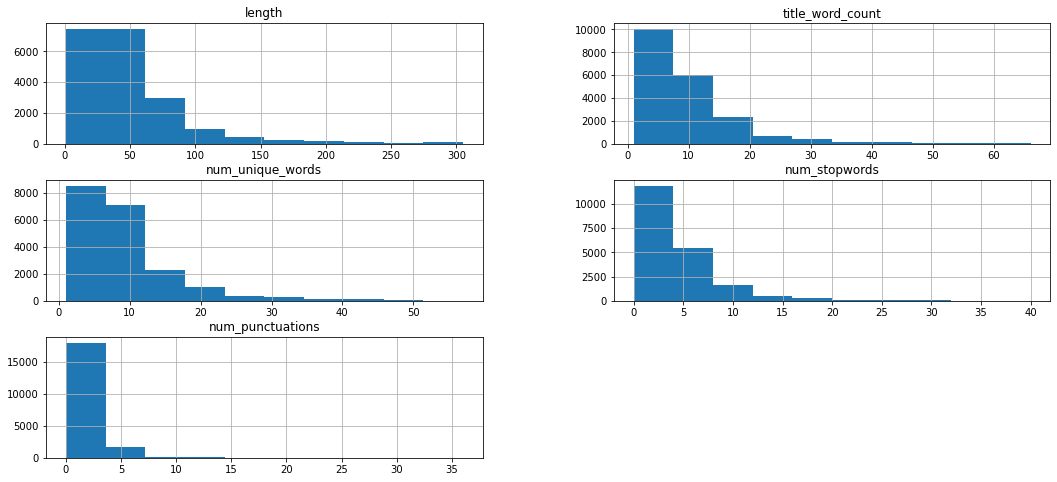

In [53]:
df.hist(figsize=(18,8));

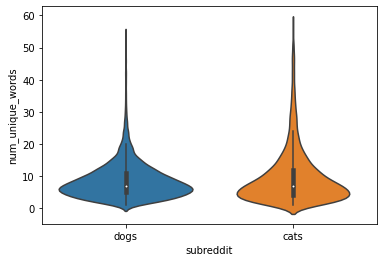

In [54]:
sns.violinplot(data=df,x="subreddit", y="num_unique_words");

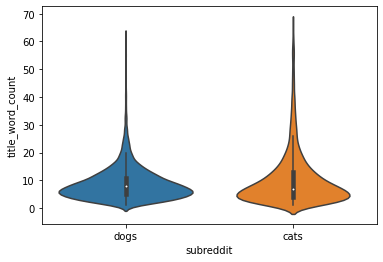

In [55]:
sns.violinplot(data=df,x="subreddit", y="title_word_count");

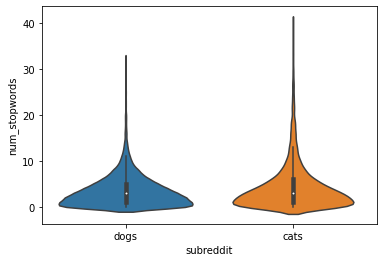

In [56]:
sns.violinplot(data=df,x="subreddit", y="num_stopwords");

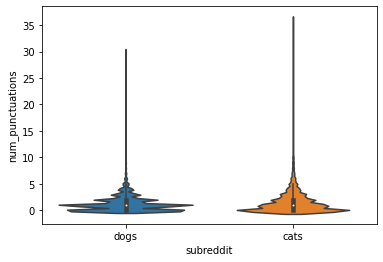

In [57]:
sns.violinplot(data=df,x="subreddit", y="num_punctuations");

In [58]:
df.groupby(['subreddit']).mean()[['length', 'title_word_count', 'num_unique_words', 'num_stopwords', 'num_punctuations']]

,length,title_word_count,num_unique_words,num_stopwords,num_punctuations
subreddit,,,,,
cats,53.342003,10.391517,9.895069,4.288086,1.537461
dogs,47.534514,8.927471,8.644558,3.449080,1.273109


- Redditors in subreddit "Cats" tend to post slightly longer titles, with more word count, unique words and stopwords 

### Word Cloud 

In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [60]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = stopwords.words('english')).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(20,15))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

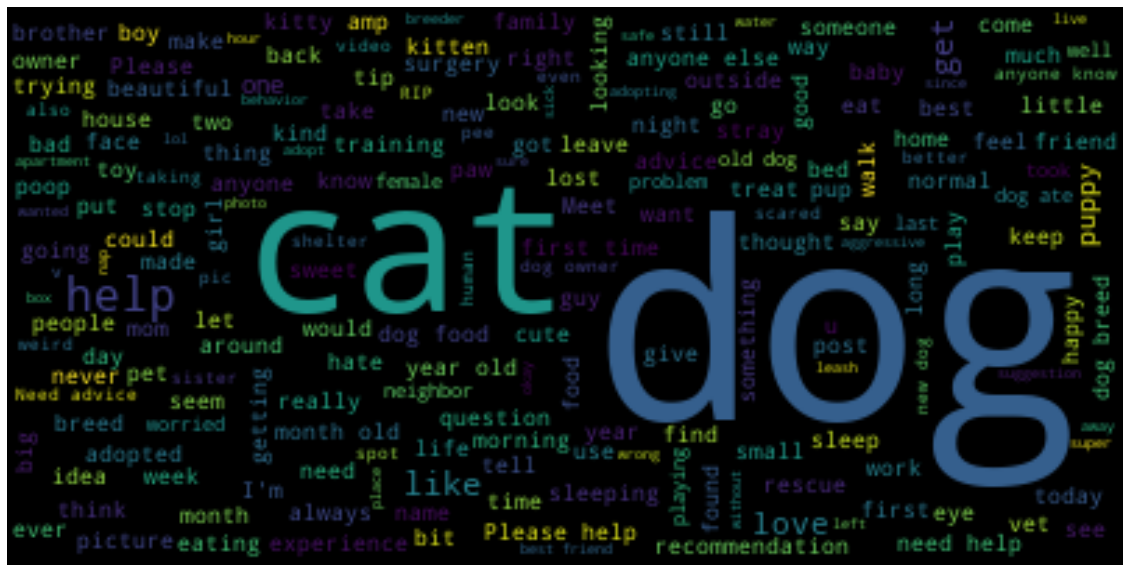

In [61]:
text =" ".join(df.title)
generate_wordcloud(text)

### Remove links

In [62]:
def remove_URL(sample):
    
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [63]:
df['clean_title'] = df['title'].apply(remove_URL)

In [64]:
df[df['language']=='unknown'] # links are cleared

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
52,dogs,:(,2,1,1,0,2,unknown,:(
1254,dogs,?,1,1,1,0,1,unknown,?
1667,dogs,https://cannabiogreenjoint.com/,31,1,1,0,5,unknown,
3334,dogs,https://youtu.be/vlQAC-PfHMk,28,1,1,0,6,unknown,
4164,dogs,https://givesendgo.com/G2CXK?utm_source=sharelink&amp;utm_medium=copy_link&amp;utm_campaign=G2CXK,97,1,1,0,17,unknown,
...,...,...,...,...,...,...,...,...,...
19061,cats,🛋🥔,2,1,1,0,0,unknown,🛋🥔
19087,cats,🧡🥰,2,1,1,0,0,unknown,🧡🥰
19225,cats,"3, 2, 1... 😹",12,4,4,0,5,unknown,"3, 2, 1... 😹"
19527,cats,😍😍😍,3,1,1,0,0,unknown,😍😍😍


### Remove numbers

In [65]:
df["clean_title"].replace('\d', '', regex=True, inplace=True)
df[["title","clean_title"]] # numbers are gone! 

,title,clean_title
0,My dog bites himself,My dog bites himself
1,How do you keep your dogs passively stimulated?,How do you keep your dogs passively stimulated?
2,Dog's Sleeping Behavior Changed with Pregnant Wife,Dog's Sleeping Behavior Changed with Pregnant Wife
3,Soft food diet after surgery,Soft food diet after surgery
4,Does anyone know much about Intracranial Arachnoid Cysts?,Does anyone know much about Intracranial Arachnoid Cysts?
...,...,...
19988,Mooches.,Mooches.
19989,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her","My y old cat Blacky passed away today. She was with me almost / of my life and although she could be very annoying, I love her"
19990,"it was a nice day out, so we let Swiper out into the backyard for a few minutes","it was a nice day out, so we let Swiper out into the backyard for a few minutes"
19991,Morning snuggles are best snuggles,Morning snuggles are best snuggles


### Remove emojis

In [66]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_title"] = df["clean_title"].apply(lambda s: deEmojify(s))

In [67]:
df[df['language']=='unknown'] #emojis in clean_title are gone!

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
52,dogs,:(,2,1,1,0,2,unknown,:(
1254,dogs,?,1,1,1,0,1,unknown,?
1667,dogs,https://cannabiogreenjoint.com/,31,1,1,0,5,unknown,
3334,dogs,https://youtu.be/vlQAC-PfHMk,28,1,1,0,6,unknown,
4164,dogs,https://givesendgo.com/G2CXK?utm_source=sharelink&amp;utm_medium=copy_link&amp;utm_campaign=G2CXK,97,1,1,0,17,unknown,
...,...,...,...,...,...,...,...,...,...
19061,cats,🛋🥔,2,1,1,0,0,unknown,
19087,cats,🧡🥰,2,1,1,0,0,unknown,
19225,cats,"3, 2, 1... 😹",12,4,4,0,5,unknown,", , ..."
19527,cats,😍😍😍,3,1,1,0,0,unknown,


### Remove punctuations

In [68]:
def text_process(mess): 
    """
    1. remove punc
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc

In [69]:
df["clean_title"] = df["clean_title"].apply(text_process)
df[["title","clean_title"]]

,title,clean_title
0,My dog bites himself,My dog bites himself
1,How do you keep your dogs passively stimulated?,How do you keep your dogs passively stimulated
2,Dog's Sleeping Behavior Changed with Pregnant Wife,Dogs Sleeping Behavior Changed with Pregnant Wife
3,Soft food diet after surgery,Soft food diet after surgery
4,Does anyone know much about Intracranial Arachnoid Cysts?,Does anyone know much about Intracranial Arachnoid Cysts
...,...,...
19988,Mooches.,Mooches
19989,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",My y old cat Blacky passed away today She was with me almost of my life and although she could be very annoying I love her
19990,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",it was a nice day out so we let Swiper out into the backyard for a few minutes
19991,Morning snuggles are best snuggles,Morning snuggles are best snuggles


### Remove stopwords

In [70]:
stop = set(stopwords.words('english'))
print(stop)

{'against', 'about', 'of', 'why', 'having', "shan't", 'it', 'i', 'not', 'until', 'then', 'ma', 'is', 'at', 'can', 'all', 'to', 'itself', 'were', 'did', 'which', 'just', 'will', 'an', 'a', 'she', 'herself', 'off', 'be', 'or', 'won', 'again', 'over', 'too', 'am', 'the', "mustn't", 'themselves', 'been', "shouldn't", 'doesn', 'couldn', 'under', 'now', 'between', 'm', 'when', 'haven', 'yourselves', "it's", 'should', "you'll", 'other', 'aren', 'out', "haven't", 'have', 'll', 'with', 'there', 'me', "you've", 'd', 'do', 'shan', 'your', "weren't", 'because', 'more', 'wasn', 'has', 'yourself', 'mightn', 'by', "she's", "hadn't", 'wouldn', 'down', 'yours', "wasn't", "should've", 'needn', 'being', 'few', 'does', "won't", 'both', 'here', 'further', 'same', 'isn', 'and', 'how', 'you', 'our', 'through', 'after', 'so', 'didn', "mightn't", "aren't", 'if', 'theirs', "don't", 'her', 'them', "you're", "that'll", 'as', 'most', 'don', 'before', 'on', 'y', 'whom', 'into', 'some', 'above', 'own', 'ours', 'his'

In [71]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [72]:
df["clean_title"] = df["clean_title"].apply(lambda s: rem_en(s))
df[["title","clean_title"]]

,title,clean_title
0,My dog bites himself,dog bites
1,How do you keep your dogs passively stimulated?,keep dogs passively stimulated
2,Dog's Sleeping Behavior Changed with Pregnant Wife,dogs sleeping behavior changed pregnant wife
3,Soft food diet after surgery,soft food diet surgery
4,Does anyone know much about Intracranial Arachnoid Cysts?,anyone know much intracranial arachnoid cysts
...,...,...
19988,Mooches.,mooches
19989,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",old cat blacky passed away today almost life although could annoying love
19990,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",nice day let swiper backyard minutes
19991,Morning snuggles are best snuggles,morning snuggles best snuggles


### Lemmatization

In [73]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [74]:
def lemma_words(sentence): 
    doc = nlp(sentence)
    sentence_output = " ".join([token.lemma_ for token in doc])
    return sentence_output

In [75]:
df["clean_title"] = df["clean_title"].apply(lemma_words)
df[["title","clean_title"]]

,title,clean_title
0,My dog bites himself,dog bite
1,How do you keep your dogs passively stimulated?,keep dog passively stimulate
2,Dog's Sleeping Behavior Changed with Pregnant Wife,dog sleep behavior change pregnant wife
3,Soft food diet after surgery,soft food diet surgery
4,Does anyone know much about Intracranial Arachnoid Cysts?,anyone know much intracranial arachnoid cyst
...,...,...
19988,Mooches.,mooch
19989,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",old cat blacky pass away today almost life although could annoying love
19990,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",nice day let swiper backyard minute
19991,Morning snuggles are best snuggles,morning snuggle good snuggle


### Stemming

In [76]:
ps = PorterStemmer()

In [77]:
def stem_words(text):
    text=text.lower() 
    words=re.split("\\s+",text)
    stemmed_words=[ps.stem(word=word) for word in words]
    return ' '.join(stemmed_words)


In [78]:
df["clean_title"] = df["clean_title"].apply(stem_words)
df[["title","clean_title"]]

,title,clean_title
0,My dog bites himself,dog bite
1,How do you keep your dogs passively stimulated?,keep dog passiv stimul
2,Dog's Sleeping Behavior Changed with Pregnant Wife,dog sleep behavior chang pregnant wife
3,Soft food diet after surgery,soft food diet surgeri
4,Does anyone know much about Intracranial Arachnoid Cysts?,anyon know much intracrani arachnoid cyst
...,...,...
19988,Mooches.,mooch
19989,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",old cat blacki pass away today almost life although could annoy love
19990,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",nice day let swiper backyard minut
19991,Morning snuggles are best snuggles,morn snuggl good snuggl


### Word Cloud 

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
wordcloud = WordCloud(collocations = False, background_color = 'white').generate("+".join(df.clean_title))

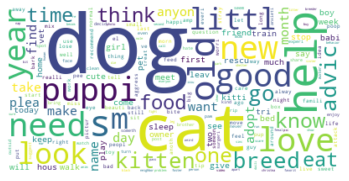

In [80]:
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
df.head(20)

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
0,dogs,My dog bites himself,20,4,4,2,0,afrikaans,dog bite
1,dogs,How do you keep your dogs passively stimulated?,47,8,8,4,1,english,keep dog passiv stimul
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7,1,1,english,dog sleep behavior chang pregnant wife
3,dogs,Soft food diet after surgery,28,5,5,1,0,danish,soft food diet surgeri
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8,2,1,english,anyon know much intracrani arachnoid cyst
5,dogs,Getting a dog while working full time?,38,7,7,2,1,english,get dog work full time
6,dogs,I need help training a dog to walk in the area I live.,54,13,12,6,1,english,need help train dog walk area live
7,dogs,Tips on how to potty train 4 month old pom and a 5 yr old yorkie?,65,16,15,5,1,english,tip potti train month old pom yr old yorki
8,dogs,"Any good guides/books for training a big, reactive adult dog? Also, any other good equipment/toys?",98,15,14,5,6,english,good guidesbook train big reactiv adult dog also good equipmenttoy
9,dogs,Moving across the country with our doggo,40,7,7,3,0,english,move across countri doggo


### Removing/Changing language

#### After checking, the 'language' rows below all have mostly/all English words. I wil change values to 'english'.

In [82]:
#df[df['language']=='albanian']
#df[df['language']=='czech']
#df[df['language']=='hungarian']
#df[df['language']=='lithuanian']
#df[df['language']=='swahili']
#df[df['language']=='vietnamese']
#df[df['language']=='slovak']
#df[df['language']=='croatian']
#df[df['language']=='slovenian']
#df[df['language']=='turkish']
#df[df['language']=='swedish']
#df[df['language']=='polish']
#df[df['language']=='indonesian']
#df[df['language']=='estonian']
#df[df['language']=='finnish']
#df[df['language']=='romanian']
#df[df['language']=='catalan']
#df[df['language']=='italian']
#df[df['language']=='french']
#df[df['language']=='german']
#df[df['language']=='tagalog']
#df[df['language']=='welsh']
#df[df['language']=='dutch']
#df[df['language']=='norwegian']
#df[df['language']=='danish']

In [83]:
df["language"].replace({"albanian": "english", "czech": "english", 
                        "hungarian": "english", "lithuanian": "english",
                        "swahili": "english","vietnamese": "english",
                       "slovak": "english","croatian": "english","slovenian": "english",
                       "turkish": "english","swedish": "english","polish": "english",
                       "indonesian": "english","estonian": "english","finnish": "english",
                       "romanian": "english","catalan": "english","italian": "english",
                       "french": "english","german": "english","tagalog": "english",
                       "welsh": "english","dutch": "english","norwegian": "english","danish": "english",}, inplace=True)

In [84]:
df['language'].value_counts()

english      19316
afrikaans      416
somali          64
unknown         63
spanish         60
portugese       56
latvian          8
arabic           6
korean           2
Name: language, dtype: int64

#### Korean language

In [85]:
df[df['language']=='korean']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
19,dogs,可爱小狗合集,6,1,1,0,0,korean,
6346,dogs,加速主义,4,1,1,0,0,korean,


- Looks like Mandarin more than korean. Either ways, can drop row 19 and 6346.

In [86]:
df.drop(19,axis=0,inplace=True)
df.drop(6346,axis=0,inplace=True)

In [87]:
df.drop(12179, axis=0,inplace=True)
df.drop(12178, axis=0,inplace=True)
df.drop(12192, axis=0,inplace=True)

#### Latvian language

In [88]:
df[df['language']=='latvian']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
4847,dogs,Vacuums,7,1,1,0,0,latvian,vacuum
12446,cats,pss..pspspssps,14,1,1,0,2,latvian,psspspspssp
15886,cats,Pspsps,6,1,1,0,0,latvian,pspsp
16072,cats,Pspsps,6,1,1,0,0,latvian,pspsp
16085,cats,Pspsps,6,1,1,0,0,latvian,pspsp
18603,cats,Otis.,5,1,1,0,1,latvian,oti
18745,cats,To jump or not to jump,22,6,5,4,0,latvian,jump jump
19174,cats,Rabies?,7,1,1,0,1,latvian,rabi


- Clean title in this language seems alright. We can keep all. 


In [89]:
df["language"].replace({"latvian": "english"}, inplace=True)

#### Arabic language

In [90]:
df[df['language']=='arabic']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
5915,dogs,علمني حبك أن أتصرف كالصبيان، أن أرسم وجهك بالطبشور على الحيطان، وعلى أشرعة الصيادين، على الأجراس، على الصلبان، علمني حبك كيف الحب يغير خارطة الأزمان، علمني أني حين أحب تكف الأرض عن الدوران. - نزار قباني,202,36,30,0,2,arabic,
5916,dogs,: ‏كان جوع مؤقت ، أنتَ اللي خانك التعبير وقولت حُـب .,53,12,12,0,2,arabic,
5917,dogs,اسماء الدلوعه,13,2,2,0,0,arabic,
5918,dogs,""" أيـن نهـاية الألـم ، أليس لكـل شيء نهـايـة "" 😔💔",49,11,10,0,2,arabic,
5920,dogs,اسماء الدلوعه,13,2,2,0,0,arabic,
5922,dogs,علمني حبك أن أتصرف كالصبيان، أن أرسم وجهك بالطبشور على الحيطان، وعلى أشرعة الصيادين، على الأجراس، على الصلبان، علمني حبك كيف الحب يغير خارطة الأزمان، علمني أني حين أحب تكف الأرض عن الدوران. - نزار قباني,202,36,30,0,2,arabic,


May consider dropping all these rows!

In [91]:
arab = df[df.language =='arabic'].index

In [92]:
arab

Int64Index([5915, 5916, 5917, 5918, 5920, 5922], dtype='int64')

In [93]:
df.drop(arab, inplace=True)

In [94]:
df[df['language']=='arabic']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title


#### Portugese language

In [95]:
df[df['language']=='portugese']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
109,dogs,Adequan overdose for dog?!,26,4,4,1,2,portugese,adequan overdos dog
148,dogs,Gastro Issues,13,2,2,0,0,portugese,gastro issu
1272,dogs,Homemade dog treat recipe,25,4,4,0,0,portugese,homemad dog treat recip
1292,dogs,Inside vs Outside dogs,22,4,4,0,0,portugese,insid vs outsid dog
1377,dogs,Doguinho Feliz - Como Proteger o Seu Cachorro dos Fogos.(How Protect Your Dog),78,13,13,2,4,portugese,doguinho feliz como proteg seu cachorro do fogoshow protect dog
1462,dogs,Help name a dog,15,4,4,1,0,portugese,help name dog
1580,dogs,Homeless dog,12,2,2,0,0,portugese,homeless dog
1983,dogs,Going from 2-doggo home to 3,28,6,6,2,1,portugese,go doggo home
2338,dogs,"[RIP] Polo, 11",14,3,3,0,3,portugese,rip polo
2339,dogs,"RIP Polo, 11",12,3,3,0,1,portugese,rip polo


-Will drop all "clean_title" with empty values

In [96]:
df.drop(2544, axis=0,inplace=True)
df.drop(9487, axis=0,inplace=True)
df.drop(10184, axis=0,inplace=True)
df.drop(10639, axis=0,inplace=True)

In [97]:
df["language"].replace({"portugese": "english"}, inplace=True)

In [98]:
df[df['language']=='portugese']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title


### Spanish language

In [99]:
pd.set_option("max_rows", None)
df[df['language']=='spanish']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
513,dogs,Esa,3,1,1,0,0,spanish,esa
771,dogs,I’ve made my decision…,22,4,4,1,0,spanish,i ve make decis
900,dogs,How do you enjoy... adult time?,31,6,6,3,4,spanish,enjoy adult time
1184,dogs,adoption,8,1,1,0,0,spanish,adopt
1458,dogs,Pro plan equal to McDonald’s?,29,5,5,1,1,spanish,pro plan equal mcdonald
1712,dogs,Labrador advice,15,2,2,0,0,spanish,labrador advic
2202,dogs,Our Eumel maybe has cancer,26,5,5,2,0,spanish,eumel mayb cancer
2371,dogs,Rescue Dog- Day 1,17,4,4,0,1,spanish,rescu dog day
2595,dogs,Funny sugar glider video,24,4,4,0,0,spanish,funni sugar glider video
2850,dogs,Some Rescues Feel Shady,23,4,4,1,0,spanish,rescu feel shadi


- All rows are mostly english. Will change all to english

In [100]:
df["language"].replace({"spanish": "english"}, inplace=True)

### Unknown language

In [101]:
pd.set_option("max_rows", None)
df[df['language']=='unknown']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
52,dogs,:(,2,1,1,0,2,unknown,
1254,dogs,?,1,1,1,0,1,unknown,
1667,dogs,https://cannabiogreenjoint.com/,31,1,1,0,5,unknown,
3334,dogs,https://youtu.be/vlQAC-PfHMk,28,1,1,0,6,unknown,
4164,dogs,https://givesendgo.com/G2CXK?utm_source=sharelink&amp;utm_medium=copy_link&amp;utm_campaign=G2CXK,97,1,1,0,17,unknown,
4485,dogs,https://gofund.me/5df2b0b8,26,1,1,0,5,unknown,
4628,dogs,https://youtu.be/Wm_Ftz4dWJ0,28,1,1,0,6,unknown,
5396,dogs,https://gofund.me/b1e8d75a,26,1,1,0,5,unknown,
5923,dogs,http://sexner6.com/big-tits-behind-bars/,40,1,1,0,9,unknown,
8530,dogs,🐕,1,1,1,0,0,unknown,


- Will drop all rows since all empty.

In [102]:
unknown1 = df[df.language =='unknown'].index

In [103]:
df.drop(unknown1, inplace=True)

### Somali language

In [104]:
df[df['language']=='somali']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
923,dogs,Did you know?,13,3,3,2,1,somali,know
1582,dogs,Said goodbye today,18,3,3,0,0,somali,say goodby today
2382,dogs,When to say goodbye?,20,4,4,2,1,somali,say goodby
2769,dogs,Mr Cuddles bark box came today,30,6,6,0,0,somali,mr cuddl bark box come today
3972,dogs,Why are dogs so loyal,21,5,5,3,0,somali,dog loyal
4624,dogs,Zymox in Ontario Canada?,24,4,4,1,1,somali,zymox ontario canada
5735,dogs,My dog was killed today,23,5,5,2,0,somali,dog kill today
5919,dogs,Hot sex with a blonde girl and a black stallion اكبر المواقع المسئوله عن الفديوهات الجنسيه❤️❤️ http://sexner6.com/her-huge-tits-bounced-with-every-movement/Hot sex with a blonde girl and a black stallion اكبر المواقع المسئوله عن الفديوهات الجنسيه❤️❤️ http://sexner6.com/her-huge-tits-bounced-with-eve,300,33,17,8,22,somali,hot sex blond girl black stallion sex blond girl black stallion
6138,dogs,How do you say sorry to your dog?,33,8,8,5,1,somali,say sorri dog
6463,dogs,Did you know?,13,3,3,2,1,somali,know


- Again, all rows are mostly english. We will change all to english, with the exception of empty row 12582. Will drop it.

In [105]:
df.drop(12582, axis=0,inplace=True)

In [106]:
df["language"].replace({"somali": "english"}, inplace=True)

In [107]:
df[df['language']=='somali']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title


### Afrikaan language

In [108]:
df[df['language']=='afrikaans']

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
0,dogs,My dog bites himself,20,4,4,2,0,afrikaans,dog bite
33,dogs,Dog barks at night,18,4,4,1,0,afrikaans,dog bark night
57,dogs,I would like advice on Huskys,29,6,6,2,0,afrikaans,would like advic huski
77,dogs,Does your dog sleep in another room?,36,7,7,3,1,afrikaans,dog sleep anoth room
125,dogs,Help Choosing Dog Name,22,4,4,0,0,afrikaans,help choos dog name
153,dogs,Does Parvo gets worse before it gets better?,44,8,7,3,1,afrikaans,parvo get bad get well
175,dogs,Booties?,8,1,1,0,1,afrikaans,booti
233,dogs,My 16 week pup like to play nip,31,8,8,2,0,afrikaans,week pup like play nip
454,dogs,Update: Dog keeps vomiting..,28,4,4,0,3,afrikaans,updat dog keep vomit
462,dogs,Dog doesn't poop,16,3,3,1,1,afrikaans,dog do not poop


- Again, all rows are mostly english. Will change all to english

In [109]:
df["language"].replace({"afrikaans": "english"}, inplace=True)

In [110]:
df['language'].value_counts() #check for language values

english    19912
Name: language, dtype: int64

### Dropping NA rows

In [111]:
df[df['language'].isna()]

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
13179,cats,Красивое,8,1,1,0,0,NaN,
19601,cats,Родиилл,7,1,1,0,0,NaN,


In [112]:
df.drop(13179, axis=0,inplace=True)
df.drop(19601, axis=0,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19912 entries, 0 to 19992
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subreddit         19912 non-null  object
 1   title             19912 non-null  object
 2   length            19912 non-null  int64 
 3   title_word_count  19912 non-null  int64 
 4   num_unique_words  19912 non-null  int64 
 5   num_stopwords     19912 non-null  int64 
 6   num_punctuations  19912 non-null  int64 
 7   language          19912 non-null  object
 8   clean_title       19912 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.5+ MB


In [114]:
df.reset_index(drop=True, inplace=True)

In [115]:
print(df.shape)
df.head(20)

(19912, 9)


,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
0,dogs,My dog bites himself,20,4,4,2,0,english,dog bite
1,dogs,How do you keep your dogs passively stimulated?,47,8,8,4,1,english,keep dog passiv stimul
2,dogs,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7,1,1,english,dog sleep behavior chang pregnant wife
3,dogs,Soft food diet after surgery,28,5,5,1,0,english,soft food diet surgeri
4,dogs,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8,2,1,english,anyon know much intracrani arachnoid cyst
5,dogs,Getting a dog while working full time?,38,7,7,2,1,english,get dog work full time
6,dogs,I need help training a dog to walk in the area I live.,54,13,12,6,1,english,need help train dog walk area live
7,dogs,Tips on how to potty train 4 month old pom and a 5 yr old yorkie?,65,16,15,5,1,english,tip potti train month old pom yr old yorki
8,dogs,"Any good guides/books for training a big, reactive adult dog? Also, any other good equipment/toys?",98,15,14,5,6,english,good guidesbook train big reactiv adult dog also good equipmenttoy
9,dogs,Moving across the country with our doggo,40,7,7,3,0,english,move across countri doggo


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19912 entries, 0 to 19911
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subreddit         19912 non-null  object
 1   title             19912 non-null  object
 2   length            19912 non-null  int64 
 3   title_word_count  19912 non-null  int64 
 4   num_unique_words  19912 non-null  int64 
 5   num_stopwords     19912 non-null  int64 
 6   num_punctuations  19912 non-null  int64 
 7   language          19912 non-null  object
 8   clean_title       19912 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [118]:
df['subreddit'].value_counts()

dogs    9975
cats    9937
Name: subreddit, dtype: int64

### Changing subreddit labels to binary data 

In [119]:
df['subreddit'] = df['subreddit'].map({'dogs': 1, 'cats': 0})

In [120]:
df.tail()

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
19907,0,Mooches.,8,1,1,0,1,english,mooch
19908,0,"My 19y old cat Blacky passed away today. She was with me almost 3/4 of my life and although she could be very annoying, I love her",130,27,27,13,3,english,old cat blacki pass away today almost life although could annoy love
19909,0,"it was a nice day out, so we let Swiper out into the backyard for a few minutes",79,18,17,11,1,english,nice day let swiper backyard minut
19910,0,Morning snuggles are best snuggles,34,5,4,1,0,english,morn snuggl good snuggl
19911,0,When I adopted him vs now,25,6,6,4,0,english,adopt vs


In [123]:
new_df = df[['subreddit','clean_title']]

In [126]:
df.head()

,subreddit,title,length,title_word_count,num_unique_words,num_stopwords,num_punctuations,language,clean_title
0,1,My dog bites himself,20,4,4,2,0,english,dog bite
1,1,How do you keep your dogs passively stimulated?,47,8,8,4,1,english,keep dog passiv stimul
2,1,Dog's Sleeping Behavior Changed with Pregnant Wife,50,7,7,1,1,english,dog sleep behavior chang pregnant wife
3,1,Soft food diet after surgery,28,5,5,1,0,english,soft food diet surgeri
4,1,Does anyone know much about Intracranial Arachnoid Cysts?,57,8,8,2,1,english,anyon know much intracrani arachnoid cyst


In [135]:
new_df.head()

,subreddit,clean_title
0,1,dog bite
1,1,keep dog passiv stimul
2,1,dog sleep behavior chang pregnant wife
3,1,soft food diet surgeri
4,1,anyon know much intracrani arachnoid cyst


In [134]:
new_df.groupby('subreddit').describe()

clean_title                  
                count unique   top freq
subreddit                              
0                9937   9347   cat   49
1                9975   9555  help   23

After cleaning, titles with the 'help'appears frequently. 

In [141]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19912 entries, 0 to 19911
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    19912 non-null  int64 
 1   clean_title  19912 non-null  object
dtypes: int64(1), object(1)
memory usage: 311.2+ KB


In [129]:
new_df.to_csv('../project_3/CSV files/final_df.csv')

In [131]:
df.to_csv('../project_3/CSV files/full_df.csv')